In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests

import mnist_input_data

In [2]:
!pwd

/home/ubuntu/infer/client_grpc/data


In [4]:
reqs = pd.read_csv('response_times.csv', index_col='Unnamed: 0')

In [5]:
reqs.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9670.000000,9898.000000,9821.000000,9841.000000
mean,0.063364,0.130143,0.207912,0.351773,0.608542,0.822888,1.079696,1.141415,1.443279,1.462911,1.814589
std,0.009632,0.019216,0.029705,0.065758,0.165676,0.265517,0.447109,0.522416,0.614255,0.591960,0.824004
min,0.005794,0.002644,0.002575,0.002985,0.003524,0.003644,0.003014,0.003432,0.004558,0.002766,0.004608
25%,0.057711,0.122180,0.200169,0.337192,0.604381,0.675307,0.797982,0.810528,0.953081,1.059483,1.241902
50%,0.063088,0.131621,0.209478,0.365734,0.679672,0.971215,1.170154,1.374873,1.661655,1.642663,1.841444
75%,0.069281,0.141011,0.220993,0.392560,0.700816,1.000001,1.485968,1.573849,1.974849,1.962244,2.588953
max,0.142926,0.241925,0.388216,0.804553,0.964128,1.061612,2.171691,1.720475,2.687686,2.191722,3.518893


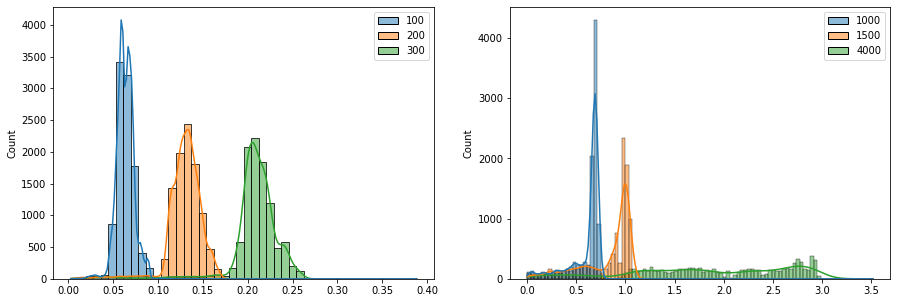

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
_ = sns.histplot(data=reqs[['100', '200', '300']], kde=True, ax=ax[0])
_ = sns.histplot(data=reqs[['1000', '1500', '4000']], kde=True, ax=ax[1])


In [7]:
# Test another run
reqs = pd.read_csv('response_times.csv', index_col='Unnamed: 0')
reqs.describe()

,100,200,300,500,1000,1500,2000,2500,3000,3500,4000
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9852.000000,9667.000000,9606.000000
mean,0.060595,0.130732,0.178714,0.303443,0.615007,0.812973,0.992616,1.267018,1.474396,1.585047,1.438284
std,0.008648,0.017395,0.026102,0.065380,0.175589,0.277645,0.381082,0.582938,0.611192,0.703136,0.574487
min,0.005957,0.002767,0.002753,0.004079,0.003102,0.003743,0.003223,0.002975,0.003865,0.008264,0.002266
25%,0.054345,0.123485,0.172347,0.302909,0.572539,0.645520,0.699598,0.855450,0.957718,1.005741,1.138226
50%,0.057965,0.129995,0.179027,0.319473,0.670833,0.923044,1.198304,1.434318,1.661300,1.808804,1.557183
75%,0.066957,0.140634,0.194934,0.337792,0.728173,1.024705,1.294397,1.821969,2.048677,2.172769,1.939446
max,0.114348,0.252896,0.350669,0.648842,1.074313,1.166476,1.356335,2.005320,2.629712,2.537487,2.316876


In [18]:
host = '128.214.252.11'
port = '8501'
batch_size = 1
image_path = "./mnist_image.pkl"
model_name = 'mnist'
signature_name = 'predict_images'


In [7]:
work_dir='/tmp'

In [8]:
test_data_set = mnist_input_data.read_data_sets(work_dir).test

Extracting /tmp/train-images-idx3-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz


In [9]:
img, label = test_data_set.next_batch(1)
img.shape

(1, 784)

In [10]:
# Fetch some images for inference

batch_size = 1
batch = np.repeat(img, batch_size, axis=0).tolist()

In [19]:
# When creating the json object, the signature name field is important otherwise the request does not succeed

json_data = {
    "signature_name": 'predict_images',
    "instances": batch
}

In [24]:
# Works when tested with local host but something seems to block the use of IP address
response_prediction = requests.post('http://128.214.252.11:8501/v1/models/mnist:predict', json=json_data)
print(response_prediction.status_code)
print(response_prediction.json())
# Predict returns the probabilities of the classes 0-9, so we need to pick the highest probability
np.argmax(response_prediction.json()['predictions'][0])

200
{'predictions': [[2.04608477e-05, 1.72721548e-09, 7.74099099e-05, 0.00364778261, 1.25222937e-06, 2.27522032e-05, 1.14668977e-08, 0.99597472, 3.68833389e-05, 0.000218785644]]}


7

In [22]:
response_prediction.

{'predictions': [[2.04608477e-05,
   1.72721548e-09,
   7.74099099e-05,
   0.00364778261,
   1.25222937e-06,
   2.27522032e-05,
   1.14668977e-08,
   0.99597472,
   3.68833389e-05,
   0.000218785644]]}